### Arithmetic series

The relevant charasteristic is that the difference between sucessions is constant

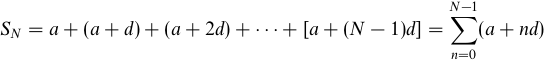

rewritten the expression, we have

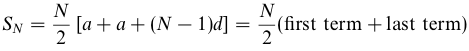

In [4]:
def arithmetic_serie(start_term_a: float | int ,
                     nth_term: int , 
                     constant_ratio_d: float | int) -> float | int:
    """
    Calculates the sum of an arithmetic series.

    Args:
        start_term_a: The first term of the arithmetic series.
        nth_term: The position of the term to be calculated.
        constant_ratio_d: The common difference between consecutive terms.

    Returns:
        The sum of the arithmetic series up to the nth term.

    Example:
    >>> arithmetic_serie(43.322, 8000,43.6)
    1395372176.0
    """
    first_term = start_term_a
    last_term = start_term_a + ((nth_term-1)*constant_ratio_d)
    return nth_term/2 * (first_term + last_term)

1395372176.0

### Geometric series

As a simple example of many of the ideas involved in series, we are going to consider
the geometric series. You may recall that in a geometric progression we multiply
each term by some ﬁxed number to get the next term. For example, the sequences are geometric progressions:


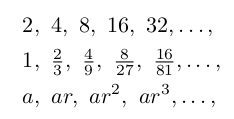

And, by the exposed, this is the general form:

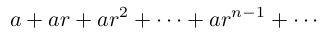

In [1]:
def geometric_series(
    nth_term: float | int,
    start_term_a: float | int,
    common_ratio_r: float | int,
) -> list[float | int]:
    """
    Pure Python implementation of Geometric Series algorithm

    :param nth_term: The last term (nth term of Geometric Series)
    :param start_term_a : The first term of Geometric Series
    :param common_ratio_r : The common ratio between all the terms
    :return: The Geometric Series starting from first term a and multiple of common
        ration with first term with increase in power till last term (nth term)
    Examples:
    >>> geometric_series(4, 2, 2)
    [2, 4.0, 8.0, 16.0]
    >>> geometric_series(4.0, 2.0, 2.0)
    [2.0, 4.0, 8.0, 16.0]
    >>> geometric_series(4.1, 2.1, 2.1)
    [2.1, 4.41, 9.261000000000001, 19.448100000000004]
    >>> geometric_series(4, 2, -2)
    [2, -4.0, 8.0, -16.0]
    >>> geometric_series(4, -2, 2)
    [-2, -4.0, -8.0, -16.0]
    >>> geometric_series(-4, 2, 2)
    []
    >>> geometric_series(0, 100, 500)
    []
    >>> geometric_series(1, 1, 1)
    [1]
    >>> geometric_series(0, 0, 0)
    []
    """
    if not all((nth_term, start_term_a, common_ratio_r)):
        return []
    series: list[float | int] = []
    power = 1
    multiple = common_ratio_r
    for _ in range(int(nth_term)):
        if not series:
            series.append(start_term_a)
        else:
            power += 1
            series.append(float(start_term_a * multiple))
            multiple = pow(float(common_ratio_r), power)
    return series

In [5]:
nth_term = float(input("Enter the last number (n term) of the Geometric Series"))
start_term_a = float(input("Enter the starting term (a) of the Geometric Series"))
common_ratio_r = float(
    input("Enter the common ratio between two terms (r) of the Geometric Series")
)
print("Formula of Geometric Series => a + ar + ar^2 ... +ar^n")
print(geometric_series(nth_term, start_term_a, common_ratio_r))

### Sum of a successive serie

Since the sum of n terms of the geometric progression

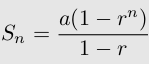 

It is possible to calculate the sum of the geometric serie (if this has one) by the below definition:

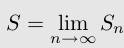

However, in the following code will check the existence of limit for the same values above. 

In the computation may appear that the calculation can encounter an overflow issue with extremely large values of nth term. In such cases, the computation may not be feasible using standard numerical approaches.

A valid workaround is to apply numerical approximation technique to estimate the resul. On this case, where we want to determine the limit, ```np.isclose``` function from NumPy can check if the partial sum is close to infinity:

In [17]:
import numpy as np

def check_geometric_series_limit(
        nth_term: float | int,
        start_term_a: float | int,
        common_ratio_r: float | int) -> bool:
    """Check the limit of a geometric series.

    Calculates the partial sum of a geometric series and checks if the partial sum
    approaches infinity.

    Args:
        nth_term: The index of the last term in the series.
        start_term_a: The value of the first term in the series.
        common_ratio_r: The common ratio between terms in the series.

    Returns:
        True if the limit of the geometric series is infinity, False otherwise.

    Examples:
        >>> check_geometric_series_limit(43200000, 203.132, 32944.3)
        True
    """

    # Define the variables
    a = start_term_a
    r = common_ratio_r

    # Calculate the partial sum of the geometric series using logarithmic approach
    if np.isclose(r, 1):
        partial_sum = a * (nth_term + 1)
    elif r > 1:
        partial_sum = np.inf
    else:
        partial_sum = a * (1 - np.exp(nth_term * np.log(r))) / (1 - r)

    # Check the limit
    if np.isclose(partial_sum, np.inf):
        return True
    return False

True